### SMS Spam Collection
                -Collection of SMS messages tagged as spam or legitimate

#### Abstract:
* The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research.
* It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

### Purpose of Analysis:
* To find the frequencies of words in the spam and non-spam messages.
* The words of the messages will be the model features

#### Structure:
* Part1: **Libraries for doing EDA process**
* Part2: **Exploring the Dataset**
* Part3: **Visualisation of Data**
* Part4: **Preparing the data for Predictive Analysis- Multinomial Naive Bayes**
    * Importing required libraries 
    * Adding an extra column for Spam count 
    * Splitting the data
    * Creating model for prediction 
    
* Part 5: **Conculsion** 

#### Importing libraries required 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the data 

In [2]:
df=pd.read_csv('sms_spam.csv')

In [3]:
df

,Category,Message,Unnamed: 2
0,ham,"Go until jurong point, crazy.. Available only ...",NaN
1,ham,Ok lar... Joking wif u oni...,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN
3,ham,U dun say so early hor... U c already then say...,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN
...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,NaN
5570,ham,Will ü b going to esplanade fr home?,NaN
5571,ham,"Pity, * was in mood for that. So...any other s...",NaN
5572,ham,The guy did some bitching but I acted like i'd...,NaN


#### Exploring Data:
* Shape
* dtypes
* info()
* Head and Tail
* droping unnecessary column 
* Frequency
* null 

In [4]:
df.shape

(5574, 3)

In [5]:
df.dtypes

Category      object
Message       object
Unnamed: 2    object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    5574 non-null   object
 1   Message     5574 non-null   object
 2   Unnamed: 2  1 non-null      object
dtypes: object(3)
memory usage: 130.8+ KB


In [7]:
df.head()

,Category,Message,Unnamed: 2
0,ham,"Go until jurong point, crazy.. Available only ...",NaN
1,ham,Ok lar... Joking wif u oni...,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN
3,ham,U dun say so early hor... U c already then say...,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN


In [8]:
df.tail()

,Category,Message,Unnamed: 2
5569,spam,This is the 2nd time we have tried 2 contact u...,NaN
5570,ham,Will ü b going to esplanade fr home?,NaN
5571,ham,"Pity, * was in mood for that. So...any other s...",NaN
5572,ham,The guy did some bitching but I acted like i'd...,NaN
5573,ham,Rofl. Its true to its name,NaN


#### Droping column 

In [9]:
df.drop(['Unnamed: 2'],axis=1,inplace=True)

In [10]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [11]:
d=df.copy()

In [12]:
d

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [13]:
des=d.groupby('Category').describe()
des

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4827   4518                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [14]:
df.isna().sum()

Category    0
Message     0
dtype: int64

#### An extra column for Spam count for further analysis 
* Assigning "1" to be **spam** and '0' to be **Non-spam**

In [15]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## Visualization of data

In [37]:
count_Category=pd.value_counts(df["Category"], sort= True)

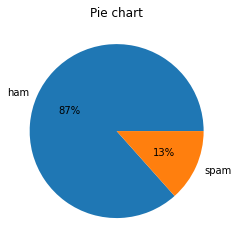

In [39]:
count_Category.plot(kind = 'pie',autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

##### In this 13% of the messages are spam

### Spliting the dataset : trained and test sets for creating model for Predictve Analysis

In [41]:
X=df.Message

In [42]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                 Will ü b going to esplanade fr home?
5571    Pity, * was in mood for that. So...any other s...
5572    The guy did some bitching but I acted like i'd...
5573                           Rofl. Its true to its name
Name: Message, Length: 5574, dtype: object

In [43]:
y=df.spam

In [44]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: spam, Length: 5574, dtype: int64

#### importing libraries 
* For spliting the data
* For creating the model 
* For ploting the visualization of model perfectness

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

* Scikit-learn’s CountVectorizer is used to transform a corpora of text to a vector of term / token counts. It also provides the capability to preprocess your text data prior to generating the vector representation making it a highly flexible feature representation module for text.

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
v=CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

* Importing NaiveBayes Classifier for the model

In [50]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [51]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.989237668161435

##### accuracy score is 98%

In [27]:
y_predict=model.predict(X_test_count)

#### The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

In [28]:
from sklearn.pipeline import Pipeline
sms= Pipeline([('vectorizer', CountVectorizer()),('nb', MultinomialNB())])

In [29]:
sms.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [30]:
sms.score(X_test,y_test)

0.9838565022421525

#### For visualizing how accurate the data is  by checking the confusionmatrix

In [53]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [54]:
performance=confusion_matrix(y_test,y_predict)

In [55]:
performance

array([[856, 127],
       [119,  13]], dtype=int64)

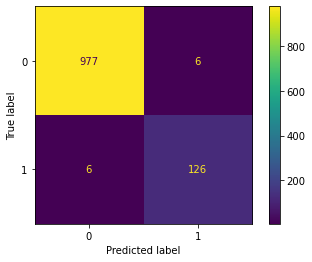

In [56]:
plot_confusion_matrix(model,X_test_count,y_test)
plt.show()

#### predicting the spam from the data passed

In [35]:
message = [
    'URGENT! You have won a 1 week FREE membership in our Â£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18',
   "I HAVE A DATE ON SUNDAY WITH WILL!!",
    "up to 20 % off"]
msg_count = v.transform(message)
model.predict(msg_count)

array([1, 0, 0], dtype=int64)

In [36]:
sms.predict(message)

array([1, 0, 0], dtype=int64)

##### Conclusion:
* In this 13% of the messages are spam
* the model is 98% accurat for predicting the **spam** 